In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle
import re

import evaluation

import pandas as pd


/home/peter/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(


DQN_single_t4td/
max t4t frac:  0.85
mean t4t frac:  0.5611038961038961
std t4t frac:  0.10639037213733991
DQN_single_t4td_small/
max t4t frac:  0.806
mean t4t frac:  0.5641493506493507
std t4t frac:  0.09060122289730661
DQN_single_t4t/
max t4t frac:  0.562
mean t4t frac:  0.49937662337662336
std t4t frac:  0.015483161327788039
DQN_single_t4t_small/
max t4t frac:  0.546
mean t4t frac:  0.49933116883116885
std t4t frac:  0.015688963444361433


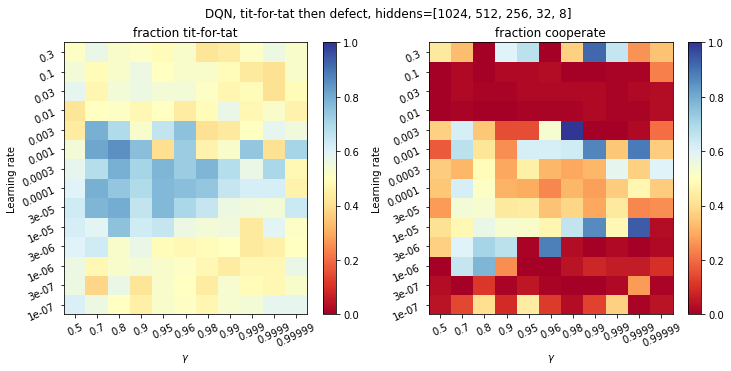

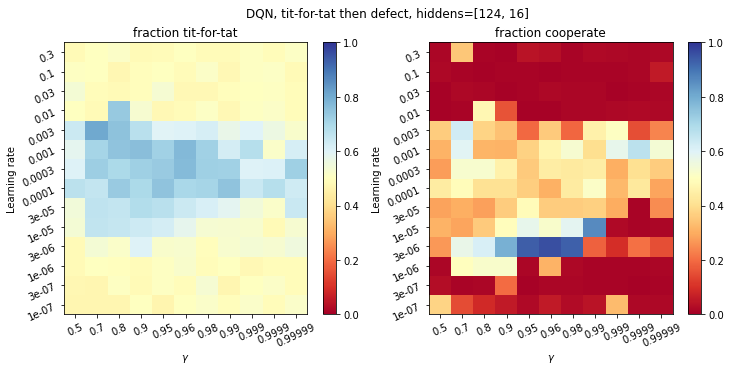

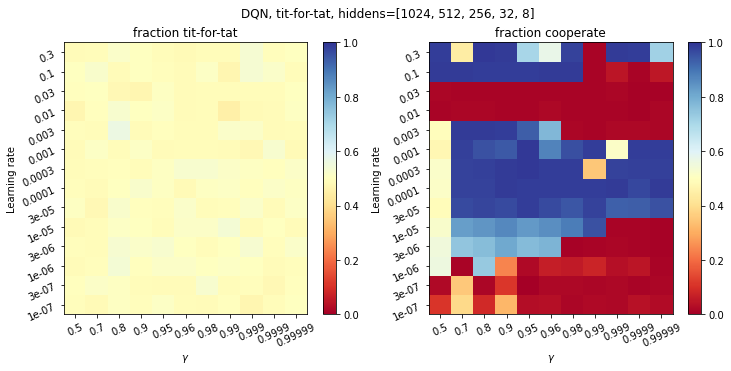

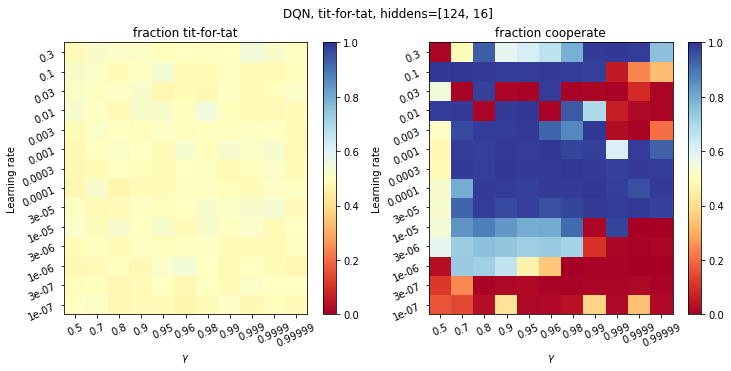

In [3]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = [  'DQN_single_t4td/', 'DQN_single_t4td_small/', 'DQN_single_t4t/','DQN_single_t4t_small/',]

titles = ['DQN, tit-for-tat then defect, hiddens=[1024, 512, 256, 32, 8]',
          'DQN, tit-for-tat then defect, hiddens=[124, 16]',
          'DQN, tit-for-tat, hiddens=[1024, 512, 256, 32, 8]',
          'DQN, tit-for-tat, hiddens=[124, 16]',]

exp_dir = exp_dirs[0]

for pltnum, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        try:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac
        except:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]
        
        coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac
        
        
    fig = plt.figure(figsize=(12,5))
    fig.add_subplot(1,2,1)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.ylabel('Learning rate')
    plt.xlabel('$\gamma$')
    plt.title('fraction tit-for-tat')
    plt.colorbar()
    plt.clim([0,1])

    fig.add_subplot(1,2,2)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.colorbar()
    plt.ylabel('Learning rate')
    plt.xlabel('$\gamma$')
    plt.title('fraction cooperate')
    plt.suptitle(titles[pltnum])
    plt.clim([0,1])
    print(exp_dir)
    print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
    print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
    print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


DQN_single_t4td/
max t4t frac:  0.85
mean t4t frac:  0.5611038961038961
std t4t frac:  0.10639037213733991
DQN_single_t4td_small/
max t4t frac:  0.806
mean t4t frac:  0.5641493506493507
std t4t frac:  0.09060122289730661
DQN_single_t4t/
max t4t frac:  0.562
mean t4t frac:  0.49937662337662336
std t4t frac:  0.015483161327788039
DQN_single_t4t_small/
max t4t frac:  0.546
mean t4t frac:  0.49933116883116885
std t4t frac:  0.015688963444361433


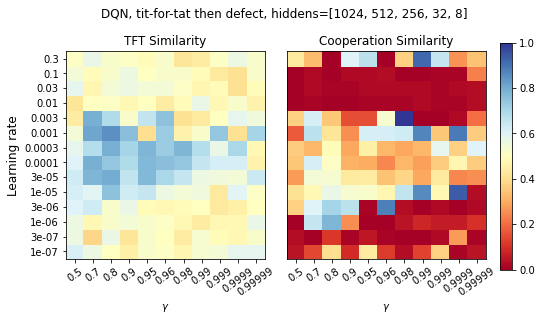

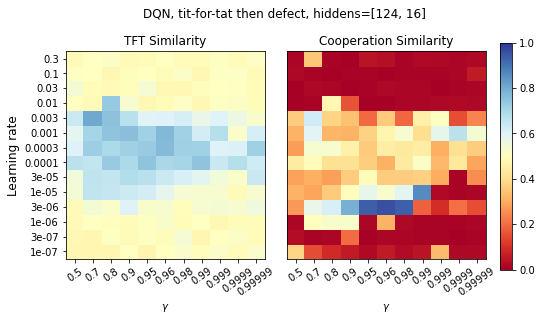

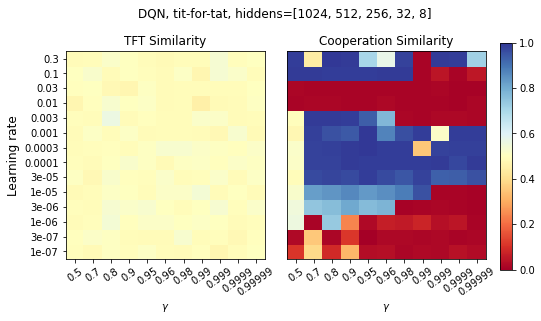

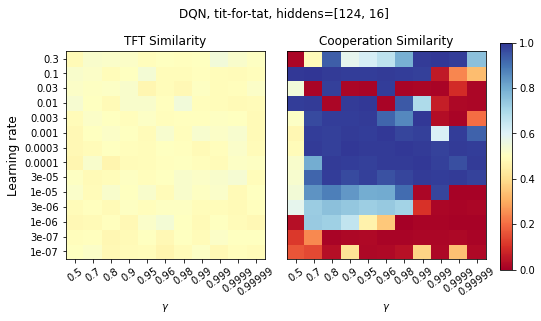

In [53]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = [  'DQN_single_t4td/', 'DQN_single_t4td_small/', 'DQN_single_t4t/','DQN_single_t4t_small/',]

titles = ['DQN, tit-for-tat then defect, hiddens=[1024, 512, 256, 32, 8]',
          'DQN, tit-for-tat then defect, hiddens=[124, 16]',
          'DQN, tit-for-tat, hiddens=[1024, 512, 256, 32, 8]',
          'DQN, tit-for-tat, hiddens=[124, 16]',]
save_titles = [
    'dqn_t4td_big.png',
    'dqn_t4td_small.png',
    'dqn_t4t_big.png',
    'dqn_t4t_small.png',   
]

exp_dir = exp_dirs[0]

for pltnum, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        try:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac
        except:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]
        
        coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac
        
        
#     fig = plt.figure(figsize=(12,6))
    fig = plt.figure(figsize=(8,4.5))
    
    fig.add_subplot(1,2,1)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=35);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=0);
    plt.ylabel('Learning rate', fontsize=12)
    plt.xlabel('$\gamma$')
    plt.title('TFT Similarity')
#     plt.colorbar()
    plt.clim([0,1])

    fig.add_subplot(1,2,2)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    im = plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=35);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=0);
    plt.yticks([])

#     plt.colorbar()
#     plt.ylabel('Learning rate')
    plt.xlabel('$\gamma$')
    plt.title('Cooperation Similarity')
    plt.suptitle(titles[pltnum])
    plt.clim([0,1])
#     plt.tight_layout()
    plt.tight_layout()
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.875, 0.17, 0.02, 0.7])
    
    fig.colorbar(im, cax=cbar_ax)

    print(exp_dir)
    print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
    print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
    print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))
    
#     plt.savefig(exp_dir[:-1],bbox_inches='tight')
    plt.savefig(save_titles[pltnum] ,bbox_inches='tight', dpi=200)    

DQN_single_t4td/
max t4t frac:  0.85
mean t4t frac:  0.5611038961038961
std t4t frac:  0.10639037213733991
DQN_single_t4td_small/
max t4t frac:  0.806
mean t4t frac:  0.5641493506493507
std t4t frac:  0.09060122289730661
DQN_single_t4t/
max t4t frac:  0.562
mean t4t frac:  0.49937662337662336
std t4t frac:  0.015483161327788039
DQN_single_t4t_small/
max t4t frac:  0.546
mean t4t frac:  0.49933116883116885
std t4t frac:  0.015688963444361433


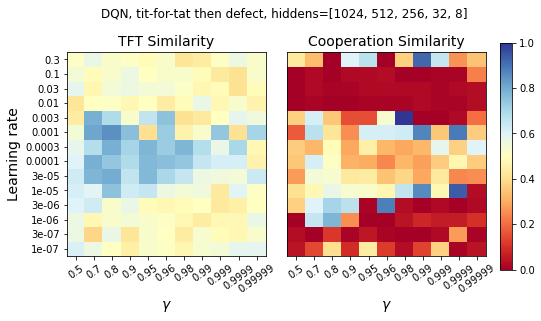

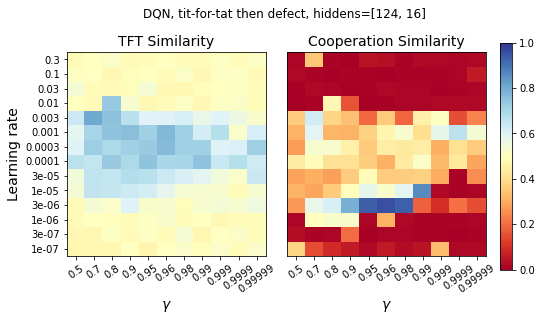

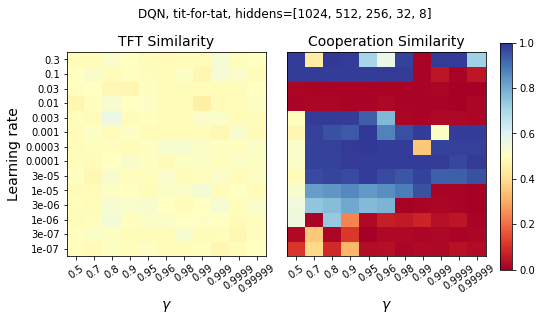

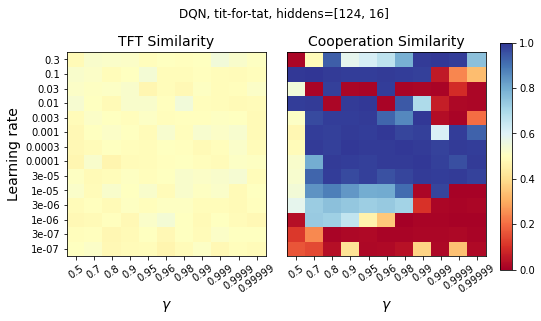

In [56]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = [
#             'PPO_single_t4td/', 
            'PPO_single_t4td_small/' , 
#             'PPO_single_t4t/', 
            'PPO_single_t4t_small/'
            ]

# base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
# exp_dirs = [  'DQN_single_t4td/', 'DQN_single_t4td_small/', 'DQN_single_t4t/','DQN_single_t4t_small/',]

titles = [
#         'PPO, tit-for-tat then defect, hiddens=[1024, 512, 256, 32, 8]',
          'PPO, tit-for-tat then defect, hiddens=[124, 16]',
#           'PPO, tit-for-tat, hiddens=[1024, 512, 256, 32, 8]',
          'PPO, tit-for-tat, hiddens=[124, 16]',]
save_titles = [
#     'ppo_t4td_big.png',
    'ppo_t4td_small.png',
#     'ppo_t4t_big.png',
    'ppo_t4t_small.png',   
]
exp_dir = exp_dirs[0]


base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = [  'DQN_single_t4td/', 'DQN_single_t4td_small/', 'DQN_single_t4t/','DQN_single_t4t_small/',]

titles = ['DQN, tit-for-tat then defect, hiddens=[1024, 512, 256, 32, 8]',
          'DQN, tit-for-tat then defect, hiddens=[124, 16]',
          'DQN, tit-for-tat, hiddens=[1024, 512, 256, 32, 8]',
          'DQN, tit-for-tat, hiddens=[124, 16]',]
save_titles = [
    'dqn_t4td_big.png',
    'dqn_t4td_small.png',
    'dqn_t4t_big.png',
    'dqn_t4t_small.png',   
]

xfs = 14
yfs =14
tfs=14

for pltnum, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        try:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac
        except:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]
        
        coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac
        
        
#     fig = plt.figure(figsize=(12,6))
    fig = plt.figure(figsize=(8,4.5))
    
    fig.add_subplot(1,2,1)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=35);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=0);
    plt.ylabel('Learning rate', fontsize=yfs)
    plt.xlabel('$\gamma$', fontsize= xfs)
    plt.title('TFT Similarity', fontsize=tfs)
#     plt.colorbar()
    plt.clim([0,1])

    fig.add_subplot(1,2,2)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    im = plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=35);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=0);
    plt.yticks([])

#     plt.colorbar()
#     plt.ylabel('Learning rate')
    plt.xlabel('$\gamma$', fontsize=xfs)
    plt.title('Cooperation Similarity', fontsize=tfs)
    plt.suptitle(titles[pltnum])
    plt.clim([0,1])
#     plt.tight_layout()
    plt.tight_layout()
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.875, 0.17, 0.02, 0.7])
    
    fig.colorbar(im, cax=cbar_ax)

    print(exp_dir)
    print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
    print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
    print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))
    
    plt.savefig(save_titles[pltnum],bbox_inches='tight', dpi=200)

176
134
PPO_single_t4td/
max t4t frac:  0.82
mean t4t frac:  0.5194405594405594
std t4t frac:  0.16074466667799991
154
154
PPO_single_t4td_small/
max t4t frac:  0.82
mean t4t frac:  0.56487012987013
std t4t frac:  0.08842956704945786
116
116
PPO_single_t4t/
max t4t frac:  0.61
mean t4t frac:  0.47231404958677686
std t4t frac:  0.11111575626441292
154
154
PPO_single_t4t_small/
max t4t frac:  0.66
mean t4t frac:  0.5090909090909091
std t4t frac:  0.047759729223868


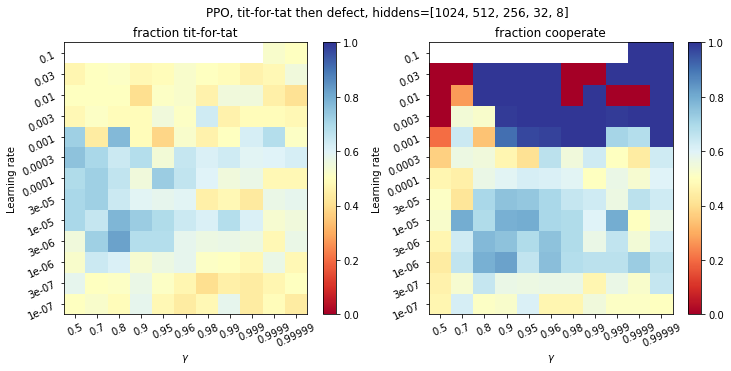

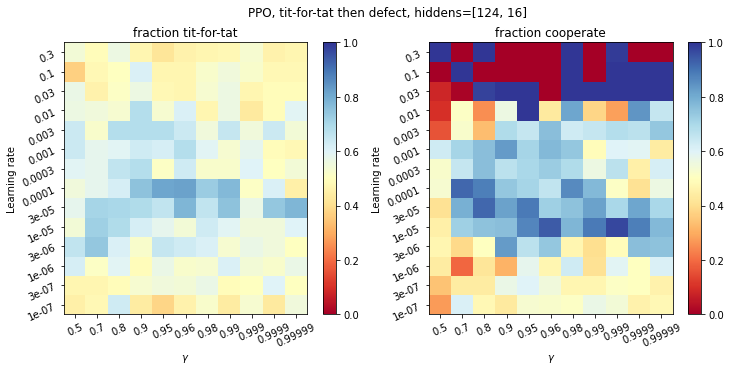

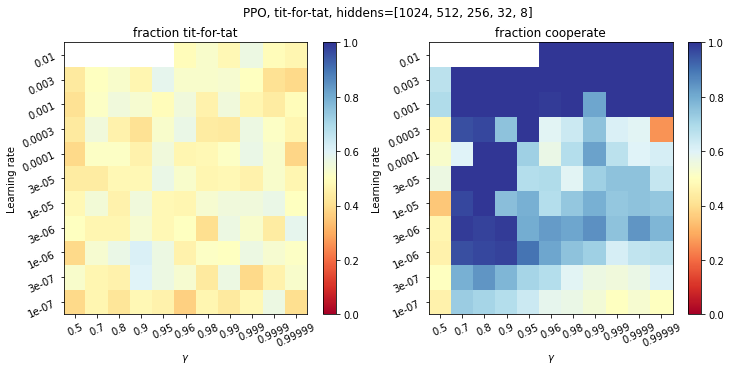

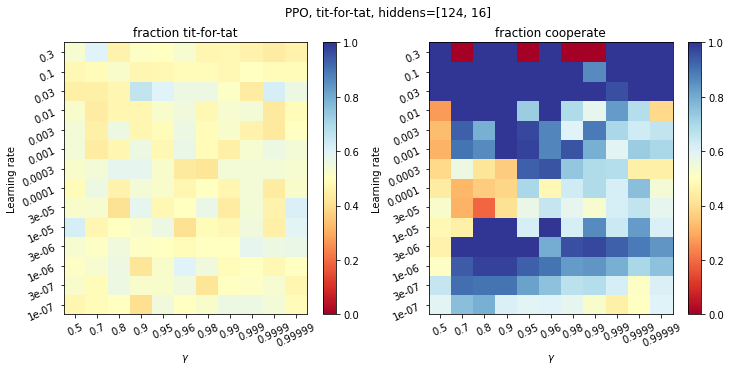

In [60]:
base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
exp_dirs = ['PPO_single_t4td/', 'PPO_single_t4td_small/' , 'PPO_single_t4t/', 'PPO_single_t4t_small/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/single_agent_runs1/big_runs/big_runs/'
# exp_dirs = [  'DQN_single_t4td/', 'DQN_single_t4td_small/', 'DQN_single_t4t/','DQN_single_t4t_small/',]

titles = ['PPO, tit-for-tat then defect, hiddens=[1024, 512, 256, 32, 8]',
          'PPO, tit-for-tat then defect, hiddens=[124, 16]',
          'PPO, tit-for-tat, hiddens=[1024, 512, 256, 32, 8]',
          'PPO, tit-for-tat, hiddens=[124, 16]',]

exp_dir = exp_dirs[0]

# exp_dirs = [exp_dirs[1]]
for pltnum, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())
    
    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    print(len(data1))
    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean
        
        try:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac
        except:
            t4t_frac_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac[0]

        coop_frac_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac
        
        
    fig = plt.figure(figsize=(12,5))
    fig.add_subplot(1,2,1)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.ylabel('Learning rate')
    plt.xlabel('$\gamma$')
    plt.title('fraction tit-for-tat')
    plt.colorbar()
    plt.clim([0, 1])

    fig.add_subplot(1,2,2)

    x1 = np.arange(len(gamma_options)+1)
    y1 = np.arange(len(lr_options)+1)
    plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
    plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
    plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
    plt.colorbar()
    plt.clim([0, 1])
    plt.ylabel('Learning rate')
    plt.xlabel('$\gamma$')
    plt.title('fraction cooperate')
    plt.suptitle(titles[pltnum])
    
    print(np.sum(np.nan_to_num(t4t_frac_arr)>0))
    print(exp_dir)
    print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
    print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
    print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))

In [6]:
np.max(t4t_frac_arr)

0.82

In [16]:
data1.loc[(data1['gamma']==0.96) & (data1['lr']==0.0001)]

,ID,gamma,lr,episode_reward_max,episode_reward_min,episode_reward_mean,coop_frac,final_episode_reward_max,final_episode_reward_mean,final_episode_reward_min,t4t_frac
133,"PPO_MG_t4td_env_59e44_00071_71_gamma=0.96,lr=0...",0.96,0.0001,"[227.0, 246.0, 252.0, 252.0, 255.0, 255.0, 260...","[59.0, 45.0, 45.0, 48.0, 48.0, 47.0, 47.0, 53....","[149.8, 147.9875, 152.85, 156.8, 154.07, 158.4...",0.66,285.0,181.14,39.0,0.82


In [61]:
154-116

38

In [62]:
38/4

9.5

In [63]:
len(gamma_options)

11

In [64]:
len(lr_options)

14